TASK 1: LINEAR ALGEBRA
Characteristic Equation: 1.0*lambda**2 - 2.3*lambda + 1.315 = 0

Eigenvalues:
  Lambda_1 = 1.2366
  Lambda_2 = 1.0634

Eigenvectors:
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]

Result: System is UNSTABLE

Graph saved as: task1_population_interaction.png


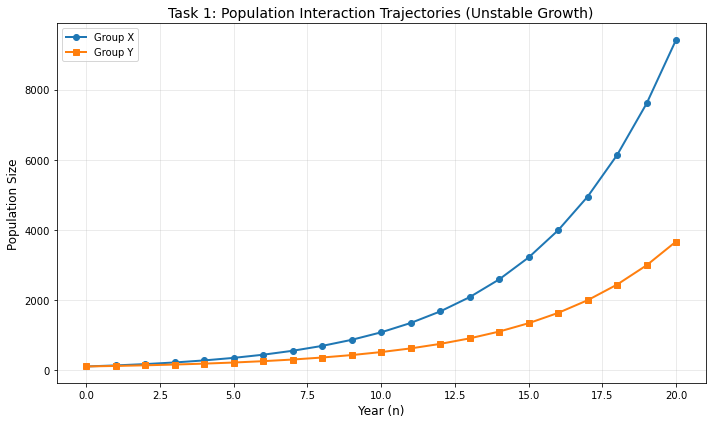

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


print("TASK 1: LINEAR ALGEBRA")

A = np.array([[1.2, 0.1], 
              [0.05, 1.1]])

lam = sp.symbols('lambda')
M = sp.Matrix(A)
char_poly = M.charpoly(lam)
print(f"Characteristic Equation: {char_poly.as_expr()} = 0")


eigenvalues, eigenvectors = np.linalg.eig(A)
print("\nEigenvalues:")
for i, val in enumerate(eigenvalues):
    print(f"  Lambda_{i+1} = {val:.4f}")

print("\nEigenvectors:")
print(eigenvectors)

# Stability Check
if all(abs(e) < 1 for e in eigenvalues):
    print("\nResult: System is STABLE")
else:
    print("\nResult: System is UNSTABLE")


years = 21
X = np.zeros((2, years))
X[:, 0] = np.array([100, 100]) 

for i in range(years - 1):
    X[:, i+1] = A @ X[:, i]


plt.figure(figsize=(10, 6))
plt.plot(range(years), X[0, :], 'o-', label='Group X', linewidth=2, color='#1f77b4')
plt.plot(range(years), X[1, :], 's-', label='Group Y', linewidth=2, color='#ff7f0e')

plt.title('Task 1: Population Interaction Trajectories (Unstable Growth)', fontsize=14)
plt.xlabel('Year (n)', fontsize=12)
plt.ylabel('Population Size', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task1_population_interaction.png', dpi=300)
print("\nGraph saved as: task1_population_interaction.png")
plt.show()

TASK 2: CALCULUS
Growth Rate Function: dP/dt = 30e^(0.03t)
Maximum Growth Rate (at Year 20): 54.6636 people/year

Graph saved as: task2_growth_rate.png


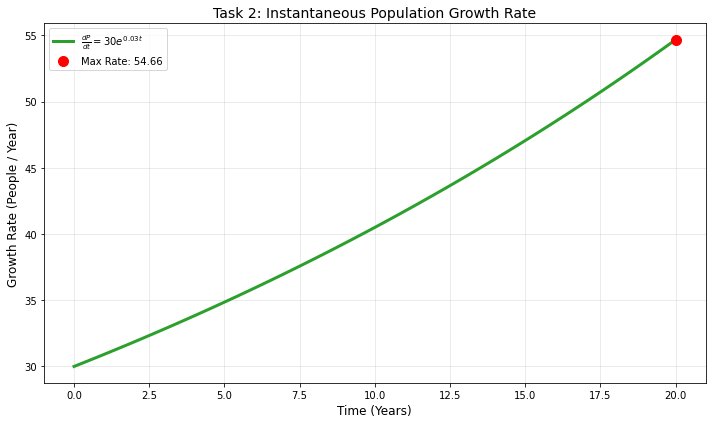

In [5]:
print("TASK 2: CALCULUS")

t_vals = np.linspace(0, 20, 100)

growth_rate = 30 * np.exp(0.03 * t_vals)

max_t = 20
max_rate = 30 * np.exp(0.03 * max_t)

print(f"Growth Rate Function: dP/dt = 30e^(0.03t)")
print(f"Maximum Growth Rate (at Year 20): {max_rate:.4f} people/year")

plt.figure(figsize=(10, 6))
plt.plot(t_vals, growth_rate, color='#2ca02c', linewidth=3, label=r'$\frac{dP}{dt} = 30e^{0.03t}$')

plt.scatter([max_t], [max_rate], color='red', s=100, zorder=5, label=f'Max Rate: {max_rate:.2f}')

plt.title('Task 2: Instantaneous Population Growth Rate', fontsize=14)
plt.xlabel('Time (Years)', fontsize=12)
plt.ylabel('Growth Rate (People / Year)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task2_growth_rate.png', dpi=300)
print("\nGraph saved as: task2_growth_rate.png")
plt.show()

TASK 3: PROBABILITY
Poisson Parameter (Lambda): 5
Expected Value (Mean): 5.0
Variance: 5.0

Graph saved as: task3_poisson_dist.png


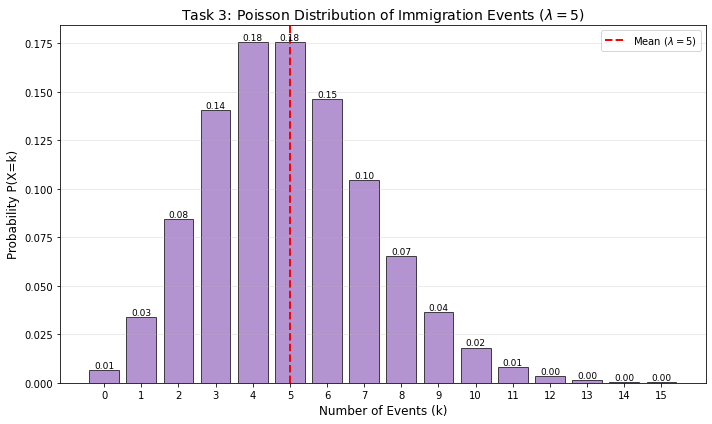

In [4]:

from scipy.stats import poisson

print("TASK 3: PROBABILITY")

lam = 5
mean_val = poisson.mean(lam)
var_val = poisson.var(lam)

print(f"Poisson Parameter (Lambda): {lam}")
print(f"Expected Value (Mean): {mean_val}")
print(f"Variance: {var_val}")

x = np.arange(0, 16)
pmf = poisson.pmf(x, lam)

plt.figure(figsize=(10, 6))
bars = plt.bar(x, pmf, color='#9467bd', alpha=0.7, edgecolor='black')

plt.axvline(lam, color='red', linestyle='--', linewidth=2, label=f'Mean ($\lambda={lam}$)')

plt.title(f'Task 3: Poisson Distribution of Immigration Events ($\lambda={lam}$)', fontsize=14)
plt.xlabel('Number of Events (k)', fontsize=12)
plt.ylabel('Probability P(X=k)', fontsize=12)
plt.xticks(x)
plt.legend()
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('task3_poisson_dist.png', dpi=300)
print("\nGraph saved as: task3_poisson_dist.png")
plt.show()

TASK 4: STATISTICS
Data: [1050 1070 1065 1080 1045 1075 1060 1070]
Sample Mean: 1064.3750
Sample Std Dev: 12.0823
95% CI: (1054.2739, 1074.4761)

Graph saved as: task4_confidence_interval.png


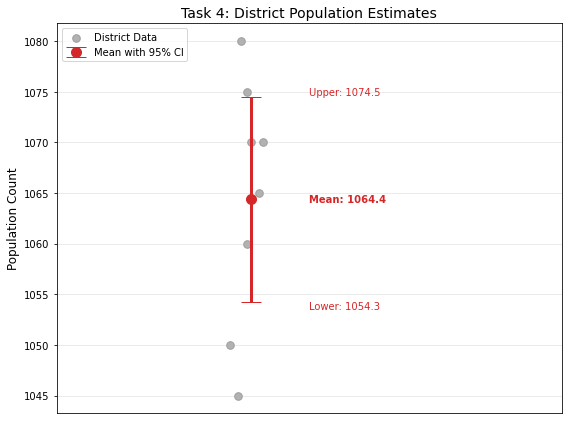

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("TASK 4: STATISTICS")

data = np.array([1050, 1070, 1065, 1080, 1045, 1075, 1060, 1070])
n = len(data)

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
std_error = sample_std / np.sqrt(n)

t_crit = stats.t.ppf(0.975, df=n-1)
margin_of_error = t_crit * std_error
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Data: {data}")
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Std Dev: {sample_std:.4f}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

plt.figure(figsize=(8, 6))

jitter = np.random.normal(0, 0.03, size=n)
plt.scatter(np.zeros(n) + jitter, data, color='gray', alpha=0.6, s=60, label='District Data')

plt.errorbar(0, sample_mean, yerr=margin_of_error, fmt='o', color='#d62728', 
             elinewidth=3, capsize=10, markersize=10, label='Mean with 95% CI')

plt.text(0.15, sample_mean, f'Mean: {sample_mean:.1f}', color='#d62728', va='center', fontweight='bold')
plt.text(0.15, ci_upper, f'Upper: {ci_upper:.1f}', color='#d62728', va='bottom')
plt.text(0.15, ci_lower, f'Lower: {ci_lower:.1f}', color='#d62728', va='top')

plt.title('Task 4: District Population Estimates', fontsize=14)
plt.ylabel('Population Count', fontsize=12)
plt.xlim(-0.5, 0.8) 
plt.xticks([])      
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('task4_confidence_interval.png', dpi=300)
print("\nGraph saved as: task4_confidence_interval.png")
plt.show()